In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from subprocess import check_output

C:\Users\alfan\anaconda3\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [5]:
# Count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [6]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


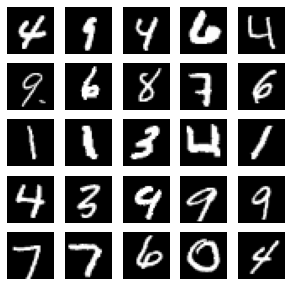

In [7]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [9]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [10]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [12]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [13]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [14]:
from keras.models import Sequential
model = Sequential()

In [15]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [17]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [18]:
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model


In [19]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 9s 14ms/step - loss: 0.4230 - accuracy: 0.8690
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1926 - accuracy: 0.9424
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1493 - accuracy: 0.9555
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1300 - accuracy: 0.9605
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1125 - accuracy: 0.9663
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1009 - accuracy: 0.9687
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0919 - accuracy: 0.9707
Epoch 8/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0870 - accuracy: 0.9728
Epoch 9/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0840 - accuracy: 0.9737
Epoch 10/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0787 - accura

In [21]:
# Evaluating the model performance

In [22]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 6ms/step - loss: 0.0664 - accuracy: 0.9819

Test accuracy: 98.2%
